Import needed libraries

In [649]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import re
import os
import tokenizermodule as tm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

Setup Global Constants

In [650]:
PROCESSED_DATA_PATH = 'processed_data'
ANALYSIS_PATH = 'analysis'

Import excel file with our input data

In [651]:
df = pd.read_excel(f"{PROCESSED_DATA_PATH}/oneandtwowithfilepath.xlsx")

Split the data set into features and labels

In [652]:
Y = df["Dialogue Move"]
features = df["Commander"]

Print the labels value counts

In [653]:
print(Y.value_counts())

Dialogue Move
send image    1033
move           969
turn           896
stop            70
explore          8
Name: count, dtype: int64


Get the number of sentences in the training data

In [654]:
num_sentences = features.size

Clean and parse the feature data

In [655]:
print ("\n Cleaning and parsing the feature data\n")
clean_features = []
for i in range( 0, len(features)):
    if (i + 1) % 100 == 0:
        print("Sentence %d of %d\n" % (i + 1, num_sentences))

    # Ensure the feature is a string before processing
    if isinstance(features[i], str):
        clean_features.append(" ".join(tm.processSentence(features[i])))
    else:
        # Handle the case where the feature is not a string (e.g., it's a float)
        clean_features.append("")


 Cleaning and parsing the feature data

Sentence 100 of 2976

Sentence 200 of 2976

Sentence 300 of 2976

Sentence 400 of 2976

Sentence 500 of 2976

Sentence 600 of 2976

Sentence 700 of 2976

Sentence 800 of 2976

Sentence 900 of 2976

Sentence 1000 of 2976

Sentence 1100 of 2976

Sentence 1200 of 2976

Sentence 1300 of 2976

Sentence 1400 of 2976

Sentence 1500 of 2976

Sentence 1600 of 2976

Sentence 1700 of 2976

Sentence 1800 of 2976

Sentence 1900 of 2976

Sentence 2000 of 2976

Sentence 2100 of 2976

Sentence 2200 of 2976

Sentence 2300 of 2976

Sentence 2400 of 2976

Sentence 2500 of 2976

Sentence 2600 of 2976

Sentence 2700 of 2976

Sentence 2800 of 2976

Sentence 2900 of 2976



Print the top 5 sentences on the feature set

In [656]:
print(clean_features[:5])

['explore room', 'send picture', 'face door left', 'face closest door left', 'go room']


Create the bag of words model for the feature set, , and convert to a numpy array

In [657]:
print ("Creating the bag of words...\n")
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(clean_features)
X = X.toarray()

Creating the bag of words...



Split features and target into train and test sets

In [658]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

Print out the labels value counts for the test data

In [659]:
y_test.value_counts()

Dialogue Move
send image    310
move          291
turn          269
stop           21
explore         2
Name: count, dtype: int64

Initialize a Random Forest classifier with 100 trees
Fit the forest to the training set.
This may take a few minutes to run

In [660]:
print ("Training the random forest (this may take a while)...")
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit( X_train, y_train)

Training the random forest (this may take a while)...


Make predictions for the test set

In [661]:
y_pred_test = forest.predict(X_test)

View accuracy score

In [662]:
accuracy_score(y_test, y_pred_test)

0.9652855543113102

View confusion matrix for test data and predictions

In [663]:
confusion_matrix(y_test, y_pred_test)

array([[  0,   1,   1,   0,   0],
       [  0, 271,   5,   4,  11],
       [  0,   0, 308,   0,   2],
       [  0,   0,   1,  20,   0],
       [  0,   3,   3,   0, 263]], dtype=int64)

Get and reshape confusion matrix data

In [664]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

Build the plot and add labels to the plot

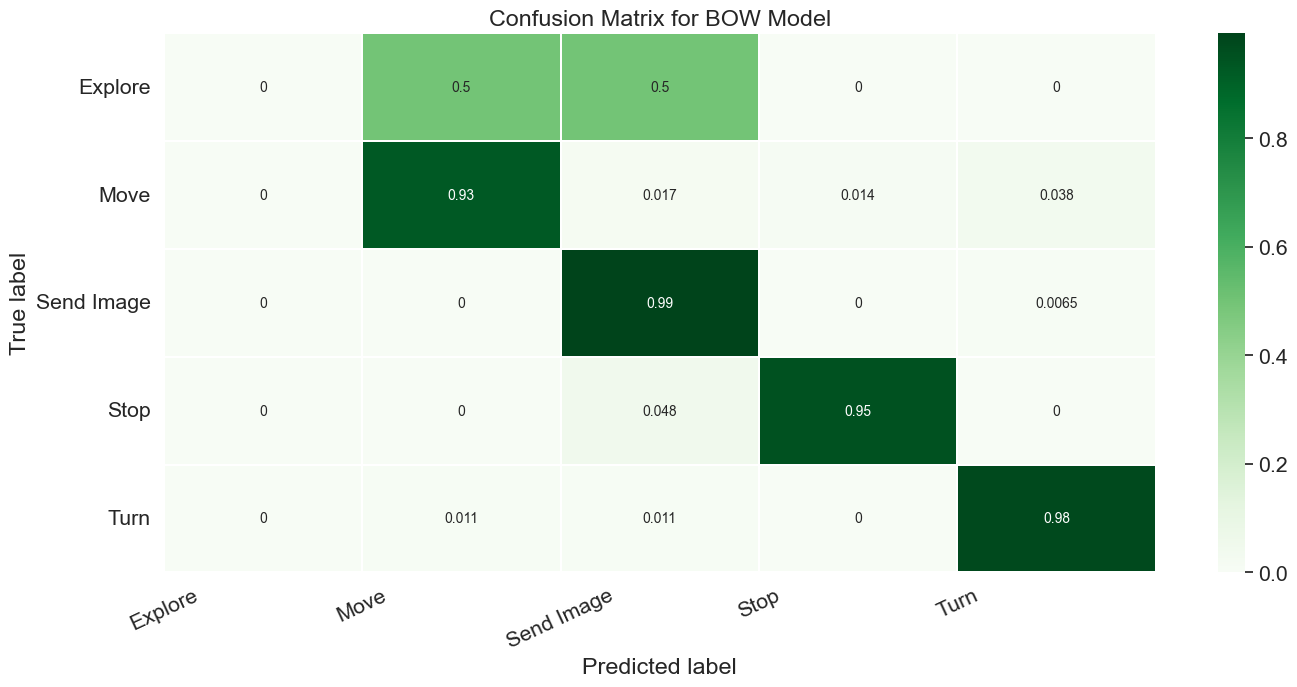

In [665]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Explore', 'Move', 'Send Image', 'Stop', 'Turn']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for BOW Model')
plt.savefig(f'{ANALYSIS_PATH}/confusion_matrix.png')
plt.show()

View and export the classification report for test data and predictions

c:\Users\17328\Documents\UMBC\CMSC\CMSC_691\CMSC691_Advanced_Robotics\virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\17328\Documents\UMBC\CMSC\CMSC_691\CMSC691_Advanced_Robotics\virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\17328\Documents\UMBC\CMSC\CMSC_691\CMSC691_Advanced_Robotics\virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

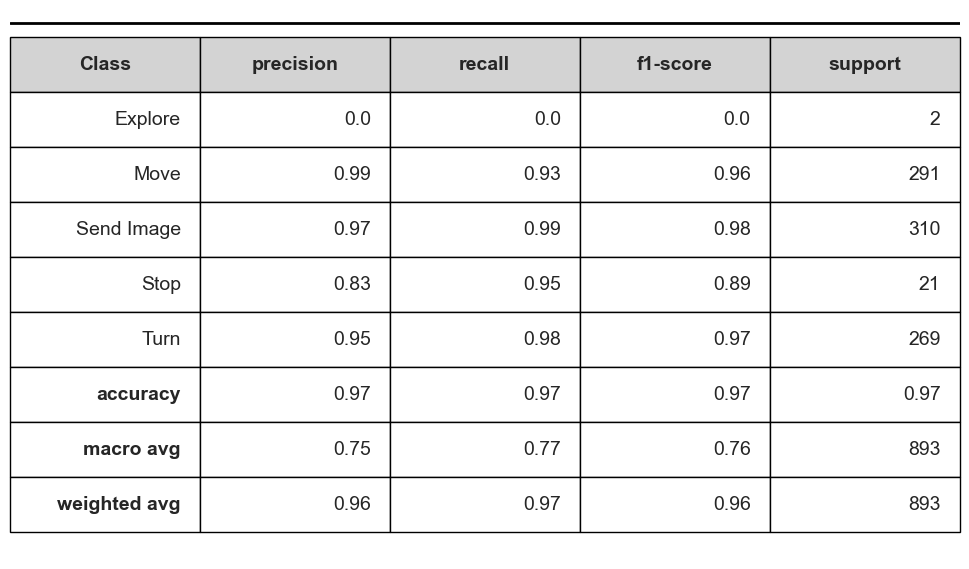

In [666]:
# Generate the classification report
report = classification_report(y_test, y_pred_test, target_names=class_names, output_dict=True)

# Convert the report to a DataFrame for easier manipulation
df_report = pd.DataFrame(report).transpose()

# Add class names as a column to the DataFrame
df_report['Class'] = df_report.index

# Reorder the columns to have 'Class' as the first column
df_report = df_report[['Class'] + [col for col in df_report.columns if col != 'Class']]

# Round precision, recall, and F1-score to two decimal places
df_report['precision'] = df_report['precision'].round(2)
df_report['recall'] = df_report['recall'].round(2)
df_report['f1-score'] = df_report['f1-score'].round(2)
df_report['support'] = df_report['support'].round(2)

# Format the 'support' column to display as strings without a decimal point, except for the 'accuracy' row
for index in df_report.index:
    if index != 'accuracy':
        df_report.at[index, 'support'] = '{:.0f}'.format(df_report.at[index, 'support'])

# Set a clean, minimalist style
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = plt.subplot(111, frame_on=False)  # No visible frame
ax.xaxis.set_visible(False)  # Hide the x axis
ax.yaxis.set_visible(False)  # Hide the y axis

# Create the table with horizontal lines
table = ax.table(cellText=df_report.values, colLabels=df_report.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)  # Slightly larger font for readability
table.scale(1, 1.4)  # Adjust the scale to fit the table

# Apply horizontal lines and bold line under the header
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Headers
        cell.set_text_props(weight='bold')  # Bold headers
        cell.set_facecolor('lightgrey')  # Grey background for headers
        cell.set_edgecolor('black')  # Line color for headers
    if j == -1:  # First column
        cell.set_text_props(weight='bold')  # Bold first column
    cell.set_edgecolor('black')  # Black lines for cells
    cell.set_height(0.1)  # Adjust height as needed

# Bold the index names of the last three rows
last_three_rows = df_report.index[-3:]
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Headers
        cell.set_text_props(weight='bold')  # Bold headers
    if j == 0 and df_report.index[i-1] in last_three_rows:  # First column and last three rows
        cell.set_text_props(weight='bold')  # Bold index names of last three rows
    cell.set_edgecolor('black')  # Black lines for cells
    cell.set_height(0.1)  # Adjust height as needed

# Draw a line under the header
line = plt.Line2D([0, 1], [0.975, 0.975], transform=ax.transAxes, color="black", linewidth=2)
ax.add_line(line)

plt.tight_layout()
plt.savefig(f"{ANALYSIS_PATH}/classification_report_table_formatted.png", bbox_inches='tight', pad_inches=0.1)
plt.show()